## Tarea 3 
### Brian Gabriel Barajas Guerrero
Usa el método de mínimos cuadrados en su versión matricial para generar diferentes modelos predictivos para el conjunto de datos que elegiste en la tarea anterior, ya sea usando más variables predictoras o bien diferentes potencias o funciones de la misma variable. \
Realiza la tarea en un notebook diferente a los vistos en clase. El notebook debe incluir descripción del conjunto de datos así como descripción del código y comparaciones entre los modelos generados. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Para la tarea anterior había usado un arreglo de una semilla aleatoria de forma que tuviera una distribución lineal, ahora voy a usar el conjunto de datos visto en clase donde se tiene registro de los tiempos en los 100 metros de las olimpiadas para hombres

In [3]:
data = np.loadtxt('/home/brianbg/Documents/ML2023/olympic100m_men.txt', delimiter=',').T
data.shape

(2, 27)

In [4]:
data

array([[1896.  , 1900.  , 1904.  , 1906.  , 1908.  , 1912.  , 1920.  ,
        1924.  , 1928.  , 1932.  , 1936.  , 1948.  , 1952.  , 1956.  ,
        1960.  , 1964.  , 1968.  , 1972.  , 1976.  , 1980.  , 1984.  ,
        1988.  , 1992.  , 1996.  , 2000.  , 2004.  , 2008.  ],
       [  12.  ,   11.  ,   11.  ,   11.2 ,   10.8 ,   10.8 ,   10.8 ,
          10.6 ,   10.8 ,   10.3 ,   10.3 ,   10.3 ,   10.4 ,   10.5 ,
          10.2 ,   10.  ,    9.95,   10.14,   10.06,   10.25,    9.99,
           9.92,    9.96,    9.84,    9.87,    9.85,    9.69]])

Text(0.5, 1.0, 'Datos')

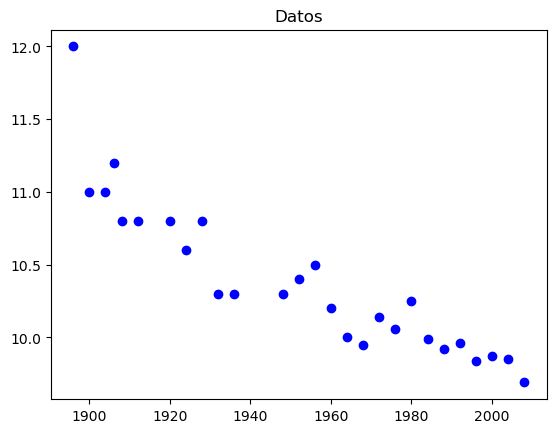

In [6]:
x = data[0]
y = data[1]

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')

In [7]:
def min_cuadrados(x, y):
    N = len(x)
    m = (np.sum(x*y) - np.sum(x)*np.sum(y)/N)/(np.sum(x*x) - (np.sum(x)**2)/N)
    b = (np.sum(y) - m*np.sum(x))/N

    return (m, b)
slope, b0 = min_cuadrados(x, y)

x1 = np.linspace(np.min(x), np.max(x), 250)

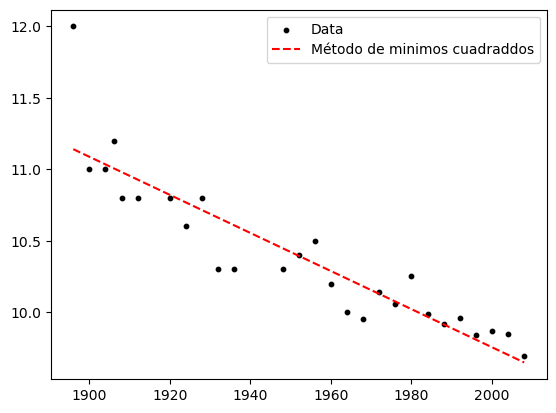

In [9]:
plt.scatter(x, y, color='black', s=10, label = 'Data')
plt.plot(x1, slope*x1 + b0, color = 'red', ls ='--', label = 'Método de minimos cuadraddos')
plt.legend();

Hacemos uso de la función definida en clase, en este caso para x²

In [10]:
def w1(x,y):
  X=np.vstack((np.ones_like(x),x, x**2)).T
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [11]:
M1 = w1(x,y)
Y1=M1[0]+M1[1]*x+M1[2]*x**2


Text(0.5, 1.0, 'Ajuste para x²')

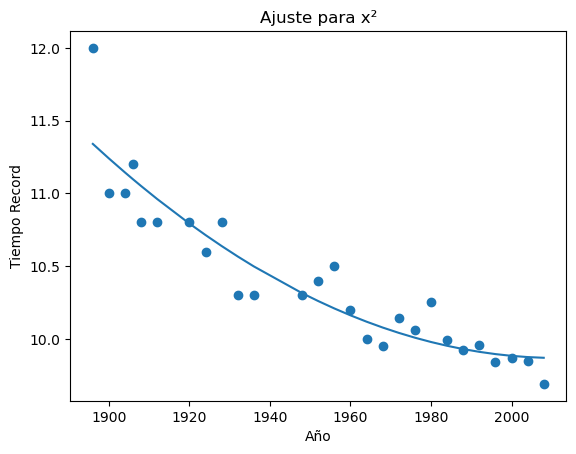

In [12]:
plt.plot(x,Y1)
plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('Tiempo Record')
plt.title("Ajuste para x²")

Ahora para agregar otro termino vamos a modificar un poco la función 

In [15]:
def w2(x,y):
  X=np.vstack((np.ones_like(x),x, x**2, x**3)).T
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [16]:
M2 = w2(x,y)
Y2=M2[0]+M2[1]*x+M2[2]*x**2 +M2[3]*x**3

Text(0.5, 1.0, 'Ajuste para x³')

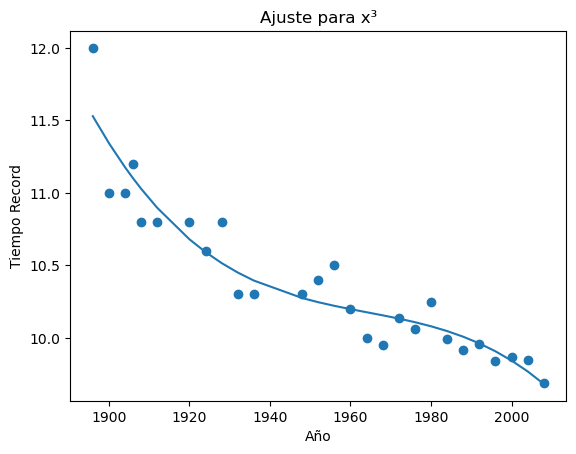

In [17]:
plt.plot(x,Y2)
plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('Tiempo Record')
plt.title("Ajuste para x³")

Vemos que el ajuste va mejorando, por lo que aumentamos el orden del polinomio

In [27]:
def w3(x,y):
  X=np.vstack((np.ones_like(x),x, x**2, x**3, x**4)).T
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [28]:
M3 = w3(x,y)
Y3=M3[0]+M3[1]*x+M3[2]*x**2 +M3[3]*x**3 + M3[4]*x**4 

Text(0.5, 1.0, 'Ajuste para x⁴')

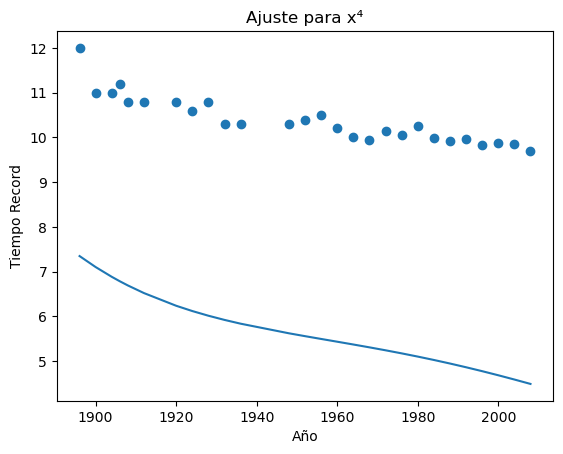

In [29]:
plt.plot(x,Y3)
plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('Tiempo Record')
plt.title("Ajuste para x⁴")

Este ajuste es malo porque nos quedamos el anterior con X³